In [1]:
# Import Splinter, BeautifulSoup, and Pandas
from splinter import Browser
from bs4 import BeautifulSoup as soup
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
# Set the executable path and initialize Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 92.0.4515
Get LATEST driver version for 92.0.4515
Get LATEST driver version for 92.0.4515
Trying to download new driver from https://chromedriver.storage.googleapis.com/92.0.4515.107/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\NAECC\.wdm\drivers\chromedriver\win32\92.0.4515.107]


In [3]:
# Visit the mars nasa news site
url = 'https://weather.com/weather/tenday/l/c497a8fe783a21075e4be0fe8e3851415b88cb2e30a6fa184550e22a7ae728c6'
browser.visit(url)

# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

False

<html dir="ltr" lang="en-US"><head>
<meta charset="utf-8" data-react-helmet="true"/><meta content="width=device-width, initial-scale=1, viewport-fit=cover" data-react-helmet="true" name="viewport"/><meta content="max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="index, follow" data-react-helmet="true" name="robots"/><meta content="origin" data-react-helmet="true" name="referrer"/><meta content="Be prepared with the most accurate 10-day forecast for Nashville, TN with highs, lows, chance of precipitation from The Weather Channel and Weather.com" data-react-helmet="true" name="description"/><meta content="#ffffff" data-react-helmet="true" name="msapplication-TileColor"/><meta content="/daily/assets/ms-icon-144x144.d353af.png" data-react-helmet="true" name="msapplication-TileImage"/><meta content="#ffffff" data-react-helmet="true" name="theme-color"/><meta content="Nashville, TN 10-Day Weather Forecast - The Weather Channel | Weather.com" data-react-helmet="t
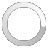
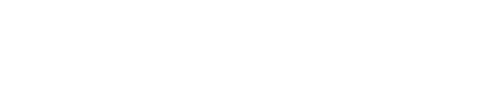
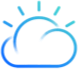

In [4]:
# Convert the browser html to a soup object and then quit the browser
html = browser.html
weather_soup = soup(html, 'html.parser')

#slide_elem = news_soup.select_one('div.list_text')

print(weather_soup)

In [5]:
weather_soup.find('span', class_='DetailsSummary--highTempValue--3Oteu')

<span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">92°</span>

In [6]:
weather_soup.find('span', class_='DetailsSummary--highTempValue--3Oteu').get_text()

'92°'

In [7]:
# Use the parent element to find all high temperatures and save as `HighTemps`
HighTemps = weather_soup.find_all('span', class_='DetailsSummary--highTempValue--3Oteu')
HighTemps

[<span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">92°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">86°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">85°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">84°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">87°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">89°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">90°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">90°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">87°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu" data-testid="TemperatureValue">87°</span>,
 <span class="DetailsSummary--highTempValue--3Oteu

In [8]:
#For Loop to grab all high temperatures
High_Temps = []
for temp in HighTemps:
    degrees = temp.get_text()
    High_Temps.append(degrees)
    
High_Temps

['92°',
 '86°',
 '85°',
 '84°',
 '87°',
 '89°',
 '90°',
 '90°',
 '87°',
 '87°',
 '88°',
 '89°',
 '89°',
 '89°',
 '90°']

In [9]:
# Use the parent element to find all low temperatures and save as `LowTemps`
LowTemps = weather_soup.find_all('span', class_='DetailsSummary--lowTempValue--3H-7I')
LowTemps

[<span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">73°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">71°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">72°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">70°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">71°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">72°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">72°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">70°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">69°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-testid="TemperatureValue">69°</span>,
 <span class="DetailsSummary--lowTempValue--3H-7I" data-test

In [10]:
#For Loop to grab all low temperatures
Low_Temps = []
for temp in LowTemps:
    degrees = temp.get_text()
    Low_Temps.append(degrees)
    
Low_Temps

['73°',
 '71°',
 '72°',
 '70°',
 '71°',
 '72°',
 '72°',
 '70°',
 '69°',
 '69°',
 '68°',
 '68°',
 '68°',
 '68°',
 '68°']

In [11]:
# Use the parent element to find all conditions and save as `Conditions`
Conditions = weather_soup.find_all('span', class_='DetailsSummary--extendedData--365A_')
Conditions

[<span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Scattered Thunderstorms</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">AM Showers</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly Cloudy</span>,
 <span class="DetailsSummary--extendedData--365A_">Partly

In [12]:
#For Loop to grab all conditions
Conditions_List = []
for condition in Conditions:
    description = condition.get_text()
    Conditions_List.append(description)
    
Conditions_List

['Partly Cloudy',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Thunderstorms',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Scattered Thunderstorms',
 'Partly Cloudy',
 'AM Showers',
 'Partly Cloudy',
 'Partly Cloudy',
 'Partly Cloudy',
 'Partly Cloudy']

In [13]:
# Use the parent element to find all wind speeds and save as `Winds`
Winds = weather_soup.find_all('span', class_='Wind--windWrapper--3aqXJ undefined')
Winds

[<span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">WSW <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">N <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">NE <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SSE <!-- -->7 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">ESE <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">S <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SSW <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">SW <!-- -->8 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">WSW <!-- -->9 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-testid="Wind">N <!-- -->9 mph</span>,
 <span class="Wind--windWrapper--3aqXJ undefined" data-tes

In [14]:
#For Loop to grab all winds
Winds_List = []
for wind in Winds:
    description = wind.get_text()
    Winds_List.append(description)
    
Winds_List

['WSW 8 mph',
 'N 7 mph',
 'NE 7 mph',
 'SSE 7 mph',
 'ESE 8 mph',
 'S 8 mph',
 'SSW 8 mph',
 'SW 8 mph',
 'WSW 9 mph',
 'N 9 mph',
 'NE 7 mph',
 'NNE 8 mph',
 'NNE 7 mph',
 'NNE 7 mph',
 'NE 7 mph']

In [15]:
#Cleaning up winds to only have speed
#Should use for loop but easy enough with only fifteen speeds
wind_info = []
wind_speeds = []
for w in Winds_List:
    info = w.split()
    wind_info.append(info)
    
wind_speeds.append(wind_info[0][1])
wind_speeds.append(wind_info[1][1])
wind_speeds.append(wind_info[2][1])
wind_speeds.append(wind_info[3][1])
wind_speeds.append(wind_info[4][1])
wind_speeds.append(wind_info[5][1])
wind_speeds.append(wind_info[6][1])
wind_speeds.append(wind_info[7][1])
wind_speeds.append(wind_info[8][1])
wind_speeds.append(wind_info[9][1])
wind_speeds.append(wind_info[10][1])
wind_speeds.append(wind_info[11][1])
wind_speeds.append(wind_info[12][1])
wind_speeds.append(wind_info[13][1])
wind_speeds.append(wind_info[14][1])
wind_speeds

['8', '7', '7', '7', '8', '8', '8', '8', '9', '9', '7', '8', '7', '7', '7']

In [16]:
# Use the parent element to find all chances of rain and save as `PrecipChances`
PrecipChances = weather_soup.find_all('span', class_='DailyContent--value--37sk2')
PrecipChances

[<span class="DailyContent--value--37sk2" data-testid="PercentageValue">23%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">WSW <!-- -->8 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">58%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">W <!-- -->6 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">58%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">N <!-- -->7 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">34%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">NE <!-- -->6 mph</span>,
 <span class="DailyContent--value--37sk2" data-testid="PercentageValue">58%</span>,
 <span class="Wind--windWrapper--3aqXJ DailyContent--value--37sk2" data-testid="Wind">NE <!-- -->7 mph</span>,
 <span class="DailyContent

In [17]:
#For Loop to grab all precips
Precips_List = []
for precip in PrecipChances:
    chance = precip.get_text()
    Precips_List.append(chance)

Precips_List_Final = [(Precips_List[0]), (Precips_List[4]), (Precips_List[8]), (Precips_List[12]), (Precips_List[16]),
                     (Precips_List[20]), (Precips_List[24]), (Precips_List[28]), (Precips_List[32]), (Precips_List[36]),
                     (Precips_List[40]), (Precips_List[44]), (Precips_List[48]), (Precips_List[52]), (Precips_List[56])]
    
Precips_List_Final

['23%',
 '58%',
 '58%',
 '58%',
 '61%',
 '37%',
 '38%',
 '38%',
 '35%',
 '24%',
 '31%',
 '24%',
 '24%',
 '24%',
 '24%']

In [18]:
# Use the parent element to find all humidity readings and save as `Humidities`
Humidities = weather_soup.find_all('span', class_='DetailsTable--value--1q_qD')
Humidities

[<span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">52%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">8 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunriseTime">6:04 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunsetTime">7:39 pm</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">80%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">0 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonriseTime">11:17 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="MoonsetTime">10:51 pm</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="PercentageValue">73%</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="UVIndexValue">7 of 10</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunriseTime">6:04 am</span>,
 <span class="DetailsTable--value--1q_qD" data-testid="SunsetTime">7:37

In [19]:
#For Loop to grab all humidities
Hums_List = []
for hum in Humidities:
    percent = hum.get_text()
    Hums_List.append(percent)

Hums_List_Final = [(Hums_List[0]), (Hums_List[8]), (Hums_List[16]), (Hums_List[24]), (Hums_List[32]),
                     (Hums_List[40]), (Hums_List[48]), (Hums_List[56]), (Hums_List[64]), (Hums_List[72]),
                     (Hums_List[80]), (Hums_List[88]), (Hums_List[96]), (Hums_List[104]), (Hums_List[112])]
    
Hums_List_Final

['52%',
 '73%',
 '75%',
 '77%',
 '71%',
 '70%',
 '68%',
 '67%',
 '68%',
 '67%',
 '63%',
 '63%',
 '62%',
 '62%',
 '60%']

In [23]:
# 5. Quit the browser
browser.quit()

In [30]:
#Creating Forecast Dataframe
forecast_df = pd.DataFrame()

forecast_df['HighTemps'] = High_Temps
forecast_df['LowTemps'] = Low_Temps
forecast_df['Conditions'] = Conditions_List
forecast_df['Winds'] = wind_speeds
forecast_df['Precipitation'] = Precips_List_Final
forecast_df['Humidity'] = Hums_List_Final

forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,92°,73°,Partly Cloudy,8,23%,52%
1,86°,71°,Scattered Thunderstorms,7,58%,73%
2,85°,72°,Scattered Thunderstorms,7,58%,75%
3,84°,70°,Scattered Thunderstorms,7,58%,77%
4,87°,71°,Thunderstorms,8,61%,71%
5,89°,72°,Scattered Thunderstorms,8,37%,70%
6,90°,72°,Scattered Thunderstorms,8,38%,68%
7,90°,70°,Scattered Thunderstorms,8,38%,67%
8,87°,69°,Scattered Thunderstorms,9,35%,68%
9,87°,69°,Partly Cloudy,9,24%,67%


In [31]:
#Removing symbols
forecast_df['HighTemps'] = forecast_df['HighTemps'].str.rstrip("°")
forecast_df['LowTemps'] = forecast_df['LowTemps'].str.rstrip("°")
forecast_df['Precipitation'] = forecast_df['Precipitation'].str.rstrip("%")
forecast_df['Humidity'] = forecast_df['Humidity'].str.rstrip("%")

forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,92,73,Partly Cloudy,8,23,52
1,86,71,Scattered Thunderstorms,7,58,73
2,85,72,Scattered Thunderstorms,7,58,75
3,84,70,Scattered Thunderstorms,7,58,77
4,87,71,Thunderstorms,8,61,71
5,89,72,Scattered Thunderstorms,8,37,70
6,90,72,Scattered Thunderstorms,8,38,68
7,90,70,Scattered Thunderstorms,8,38,67
8,87,69,Scattered Thunderstorms,9,35,68
9,87,69,Partly Cloudy,9,24,67


In [32]:
#Converting to out of strings
forecast_df['HighTemps'] = forecast_df['HighTemps'].astype(float)
forecast_df['LowTemps'] = forecast_df['LowTemps'].astype(float)
forecast_df['Winds'] = forecast_df['Winds'].astype(float)
forecast_df['Precipitation'] = forecast_df['Precipitation'].astype(float)
forecast_df['Humidity'] = forecast_df['Humidity'].astype(float)

#Converting Precipitation to decimal
forecast_df['Precipitation'] = (forecast_df['Precipitation'] / 100)

forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,92.0,73.0,Partly Cloudy,8.0,0.23,52.0
1,86.0,71.0,Scattered Thunderstorms,7.0,0.58,73.0
2,85.0,72.0,Scattered Thunderstorms,7.0,0.58,75.0
3,84.0,70.0,Scattered Thunderstorms,7.0,0.58,77.0
4,87.0,71.0,Thunderstorms,8.0,0.61,71.0
5,89.0,72.0,Scattered Thunderstorms,8.0,0.37,70.0
6,90.0,72.0,Scattered Thunderstorms,8.0,0.38,68.0
7,90.0,70.0,Scattered Thunderstorms,8.0,0.38,67.0
8,87.0,69.0,Scattered Thunderstorms,9.0,0.35,68.0
9,87.0,69.0,Partly Cloudy,9.0,0.24,67.0


In [38]:
#Transforming Conditions text to match with model
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Partly Cloudy", "Partially cloudy", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Thunderstorms", "Rain", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("Scattered", "", case = False)
forecast_df['Conditions'] = forecast_df['Conditions'].str.replace("AM Showers", "Rain", case = False)
forecast_df

,HighTemps,LowTemps,Conditions,Winds,Precipitation,Humidity
0,92.0,73.0,Partially cloudy,8.0,0.23,52.0
1,86.0,71.0,Rain,7.0,0.58,73.0
2,85.0,72.0,Rain,7.0,0.58,75.0
3,84.0,70.0,Rain,7.0,0.58,77.0
4,87.0,71.0,Rain,8.0,0.61,71.0
5,89.0,72.0,Rain,8.0,0.37,70.0
6,90.0,72.0,Rain,8.0,0.38,68.0
7,90.0,70.0,Rain,8.0,0.38,67.0
8,87.0,69.0,Rain,9.0,0.35,68.0
9,87.0,69.0,Partially cloudy,9.0,0.24,67.0


In [41]:
# Generate our categorical variable lists
application_cat = forecast_df.dtypes[forecast_df.dtypes == "object"].index.tolist()
application_cat

['Conditions']

In [42]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(forecast_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,Conditions_ Rain,Conditions_Partially cloudy,Conditions_Rain
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [43]:
# Merge one-hot encoded features and drop the originals
forecast_df_final = forecast_df.merge(encode_df, left_index=True,right_index=True)
forecast_df_final = forecast_df_final.drop(columns = application_cat)
forecast_df_final

,HighTemps,LowTemps,Winds,Precipitation,Humidity,Conditions_ Rain,Conditions_Partially cloudy,Conditions_Rain
0,92.0,73.0,8.0,0.23,52.0,0.0,1.0,0.0
1,86.0,71.0,7.0,0.58,73.0,1.0,0.0,0.0
2,85.0,72.0,7.0,0.58,75.0,1.0,0.0,0.0
3,84.0,70.0,7.0,0.58,77.0,1.0,0.0,0.0
4,87.0,71.0,8.0,0.61,71.0,0.0,0.0,1.0
5,89.0,72.0,8.0,0.37,70.0,1.0,0.0,0.0
6,90.0,72.0,8.0,0.38,68.0,1.0,0.0,0.0
7,90.0,70.0,8.0,0.38,67.0,1.0,0.0,0.0
8,87.0,69.0,9.0,0.35,68.0,1.0,0.0,0.0
9,87.0,69.0,9.0,0.24,67.0,0.0,1.0,0.0
